In [1]:
'''
@HTM
26/02/2020
Se realizan los descriptivos de los datos disponibles, 
se caracterizan los constraint de los datos
'''
#Paquetes y Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
#import plotly as ply
#import plotly.express as px
from scipy.stats import mode
from tqdm import tqdm_notebook
import os
import scipy as sp
from scipy.fftpack import fft, ifft
from scipy import signal
#import plotly.graph_objects as go
from scipy import stats
import pylab
import gc # vacia la memoria  
import statsmodels.api as sm


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [10]:
data =pd.read_csv("C:/Users/htobon/OneDrive - Grupo-exito.com/Motor AB/covid_2020export.txt");
data2=pd.read_csv("C:/Users/htobon/OneDrive - Grupo-exito.com/Motor AB/covid_2020export2.txt");

data3 =pd.read_csv("C:/Users/htobon/OneDrive - Grupo-exito.com/Motor AB/2020 sublineas.txt");
data4 =pd.read_csv("C:/Users/htobon/OneDrive - Grupo-exito.com/Motor AB/2019 sublineas.txt");

data= pd.concat([data,data3])
data2= pd.concat([data2,data4])
#redefinir el conjunto de datos


#Retirar unidades negativas
undsfilter=data[data.und>0];
undsfilter2=data2[data2.und>0];
#Organizar por fecha
undsfilter=undsfilter.sort_values(by=['TransactionDT'],ascending=True)
undsfilter2=undsfilter2.sort_values(by=['TransactionDT'],ascending=True)

In [24]:
nombres_sl=[]
arr_sl_name=pd.DataFrame(undsfilter, columns= ['SubLineCD','SubLineName'])
arr_sl_name= arr_sl_name.drop_duplicates('SubLineCD')
arrsl=arr_sl_name.to_numpy()
#arrsl=arrsl.flatten();
    
for i in arrsl:
    nombres_sl.append((i[1],i[0]))


def nombres_categorias(subline):
    nombres=[]
    
    data_hist=undsfilter[undsfilter.SubLineCD==subline];
    arr_cat_name=pd.DataFrame(data_hist, columns= ['CategoryCD','CategoryName'])
    arr_cat_name= arr_cat_name.drop_duplicates('CategoryCD')
    arrcats=arr_cat_name.to_numpy()
    
    for i in arrcats:
        nombres.append((i[1],i[0]))
    return nombres

#Hace el analisis en series de tiempo y devuelve el objeto con tendencia  y los otros
def comportamiento_historico(Cat_CD):
    #selecciono la categoría 
    data_hist=undsfilter[undsfilter.CategoryCD==Cat_CD];
    historico=pd.DataFrame(data_hist, columns= ['und'])
    
    data_hist2=undsfilter2[undsfilter2.CategoryCD==Cat_CD];
    historico2=pd.DataFrame(data_hist2, columns= ['und'])
    
    
    arr_1=historico.to_numpy()
    arr_1=arr_1.flatten()
    
    
    arr_2=historico2.to_numpy()
    arr_2=arr_2.flatten()
    
    return arr_1, arr_2

#Muestra las compras brutas
def plothist(Cat_CD):
    arr20, arr19=comportamiento_historico(Cat_CD)
    plt.plot(arr20)
    plt.plot(arr19)
    plt.show
    
    
def time_trend(cat):
    
    #Le doy formato a la consulta
    data_hist=undsfilter[undsfilter.CategoryCD==cat];
    data_set=pd.DataFrame(data_hist, columns= ['TransactionDT','und'])
    data_set['TransactionDT']=pd.to_datetime(data_set['TransactionDT'])
    
    data_set=data_set.set_index('TransactionDT')

    
    #Hago el anlisis con series de tiempo
    decomposition1=sm.tsa.seasonal_decompose(data_set,model='additive')
    
    #Le doy formato a la consulta
    data_hist=undsfilter2[undsfilter2.CategoryCD==cat];
    data_set=pd.DataFrame(data_hist, columns= ['TransactionDT','und'])
    data_set['TransactionDT']=pd.to_datetime(data_set['TransactionDT'])
    
        
    data_set=data_set.set_index('TransactionDT')
    #hago el analisis
    decomposition2=sm.tsa.seasonal_decompose(data_set,model='additive')
    
    return decomposition1, decomposition2

def plot_trend(cat):
    
    d1, d2 =time_trend(cat)
    
    data_hist=undsfilter[undsfilter.CategoryCD==cat];
    
    #data_val=pd.DataFrame(data_hist, columns= ['und'])
    y_min=0
    y_max=np.max([np.max(d1.trend),np.max(d2.trend)])
    cat_name=pd.DataFrame(data_hist, columns= ['CategoryName'])
    cat_name= cat_name.drop_duplicates('CategoryName')
    arrC=cat_name.values

    plt.plot(np.asarray(d1.trend), c='red',label="2020")
    plt.plot(np.asarray(d2.trend), c='blue',label="2019")
    plt.title('Gráfica de tendencias'+" CategoryCD="+ str(cat)+" "+arrC[0,0])
    plt.xlabel('Días')
    plt.ylabel('Unds')
    plt.vlines(x=40,ymin=y_min,ymax=y_max,linestyles='dashed',label="Aniversario")
    plt.vlines(x=58,ymin=y_min,ymax=y_max,linestyles='dashed')
    plt.vlines(x=50,ymin=y_min,ymax=y_max,linestyles='solid',colors="g",label="Covid-19")
    plt.vlines(x=64,ymin=y_min,ymax=y_max,linestyles='dotted',colors="m",label="Cuarentena")
    plt.legend(loc='upper left')
    

In [12]:
nombres_sl

[('BEBIDAS CALIENT/Y ALMT.NATURIS', 92),
 ('INFORMATICA', 65),
 ('PEQUENOS ELECTRODOMESTICOS', 51),
 ('PASABOCAS', 59),
 ('AUDIO Y VIDEO', 53),
 ('CONFITERIA', 407),
 ('GRANDES ELECTRODOMESTICOS', 52),
 ('DERIVADOS LACTEOS', 83),
 ('GALLETAS Y HARINAS', 93),
 ('MEZCLAS Y BEBIDAS EN POLVO', 69),
 ('PANADERIA', 88),
 ('PANADERIA INUSTRI.Y REPOSTERIA', 81),
 ('CELULARES Y ACCESORIOS', 501),
 ('PAPELES Y ABSORBENTES', 67),
 ('CARNES FRIAS/CONGELAD/Y AREPAS', 80),
 ('DELICATESSEN', 68),
 ('SALSAS Y CONDIMENTOS', 402),
 ('ENLATADOS', 94),
 ('FRUVER', 85)]

In [16]:
nombres_categorias(402)

[('DULCES TIPICOS Y BOCADILLOS', 40267)]

In [6]:
dates= pd.DataFrame(undsfilter, columns= ['TransactionDT'])
dates= dates.drop_duplicates('TransactionDT')
arrC=dates.to_numpy()
arrC=arrC.flatten();

np.where(arrC==['2020-02-27'])

(array([42], dtype=int64),)

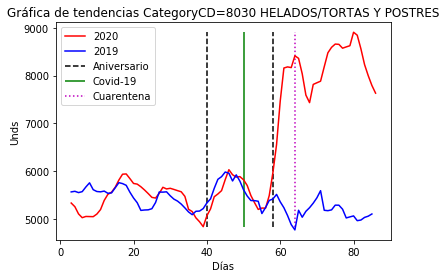

In [14]:
plot_trend(8030)

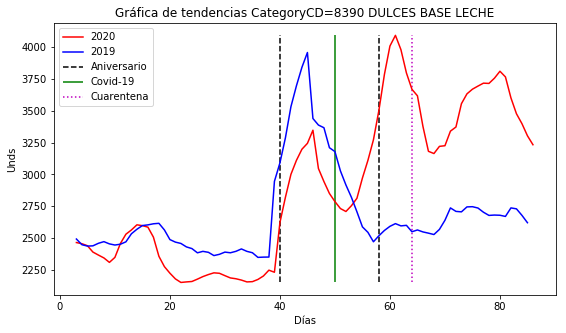

In [23]:
plot_trend(8390)

In [6]:
def f(x):
    plot_trend(arrcats[x])

In [7]:
interact(f, x=widgets.IntSlider(min=0, max=np.shape(arrcats)[0]-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='x', max=19), Output()), _dom_classes=('widget-interact',…

In [27]:
np.shape(arrcats)[0]

20

In [18]:
from IPython.display import display

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget

x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

NameError: name 'FloatSlider' is not defined

In [20]:
a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

widgets.link((a, 'value'), (b, 'value'))
widgets.link((a, 'value'), (c, 'value'))
widgets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

In [27]:

widgets.Dropdown(
    options=nombres,
    description='Number:',
    disabled=False
)

Dropdown(description='Number:', options=(('PASABOCAS PUESTOS DE PAGO', 5920), ('FRUTOS SECOS', 5956), ('FRUTOS…

In [38]:
x = widgets.Dropdown(options=[('a',5),('b',5)])
y = widgets.Dropdown(options=[' - '])

def change_x(*args):
    

    y.index = None
    y.options=[*args]
    
x.observe(change_x, 'value')

widgets.HBox([x,y])

In [43]:
f3=widgets.Dropdown(
    options=[('One', 1), ('Two', 2), ('Three', 3)],
    value=2,
    description='Number:',
)

def change_f3(*args):
    print(f3.value)

f3.observe(change_f3,'value')
widgets.HBox([f3])


1
2
3
2
1
2
1


In [173]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [16]:
data_hist=undsfilter[undsfilter.CategoryCD==2715];
arr_cat_name=pd.DataFrame(data_hist, columns= ['CategoryCD','CategoryName'])
arr_cat_name= arr_cat_name.drop_duplicates('CategoryCD')
arr_Cat_name=(arr_cat_name.values).flatten()

In [18]:
arr_Cat_name[1]

'BRASIER Y TOP JUNIOR MP'

In [13]:
def f4(Sublinea):
    
    y=int(Sublinea)
    
    nombres=nombres_categorias(y)
    
    interact(f2, Categoria=nombres)



def f2(Categoria):
    y=Categoria
    plot_trend(int(y))


In [21]:
nombres_sl

[('BEBIDAS CALIENT/Y ALMT.NATURIS', 92),
 ('INFORMATICA', 65),
 ('PEQUENOS ELECTRODOMESTICOS', 51),
 ('PASABOCAS', 59),
 ('AUDIO Y VIDEO', 53),
 ('CONFITERIA', 407),
 ('GRANDES ELECTRODOMESTICOS', 52),
 ('DERIVADOS LACTEOS', 83),
 ('GALLETAS Y HARINAS', 93),
 ('MEZCLAS Y BEBIDAS EN POLVO', 69),
 ('PANADERIA', 88),
 ('PANADERIA INUSTRI.Y REPOSTERIA', 81),
 ('CELULARES Y ACCESORIOS', 501),
 ('PAPELES Y ABSORBENTES', 67),
 ('CARNES FRIAS/CONGELAD/Y AREPAS', 80),
 ('DELICATESSEN', 68),
 ('SALSAS Y CONDIMENTOS', 402),
 ('ENLATADOS', 94),
 ('FRUVER', 85)]

In [25]:
interact(f4, Sublinea=nombres_sl)

interactive(children=(Dropdown(description='Sublinea', options=(('BEBIDAS CALIENT/Y ALMT.NATURIS', 92), ('INFO…

<function __main__.f4(Sublinea)>